# Model with made with relu and sigmoid activation function

In [1]:
import sys

sys.path.append("../python")

from data import Dataloader
from models import HeuristicModelSiameseNetwork3 as HeuristicModel

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

model = HeuristicModel()
model.fit(X,Y)
# model.load_model_weights("./weights/heuristic_model_weights_3")




Epoch 1/50


c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



1093/1093 [==============================] - 2s 1ms/step - loss: 0.4740 - val_loss: 0.4230
Epoch 2/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4366 - val_loss: 0.4207
Epoch 3/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4348 - val_loss: 0.4210
Epoch 4/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4338 - val_loss: 0.4216
Epoch 5/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4332 - val_loss: 0.4236
Epoch 6/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4304 - val_loss: 0.4211
Epoch 7/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4308 - val_loss: 0.4232
Epoch 7: early stopping
Epoch 1/50
1060/1060 [==============================] - 2s 1ms/step - loss: 0.4729 - val_loss: 0.4370
Epoch 2/50
1060/1060 [==============================] - 1s 1ms/step - loss: 0.4370 - val_loss: 0.4343
Epoch 3/50
1060/1060 [==============================] - 1s 1ms/step 

In [2]:
model.save_model_weights("./weights/heuristic_model_weights_3")

Modèles sauvegardés dans ./weights/heuristic_model_weights_3


In [3]:
model.predict_utility(X)[:3]

1251/1251 [==============================] - 1s 669us/step


array([[0.49994344, 0.49999997, 0.7309671 ],
       [0.5001563 , 0.49999997, 0.7288429 ],
       [0.50004905, 0.7305754 , 0.7309754 ]], dtype=float32)

In [4]:
model.predict_preference(X[:3], Y[:3])

1/1 [==============================] - 0s 16ms/step


array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 1]])

In [5]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))

1251/1251 [==============================] - 1s 754us/step
Percentage of explained preferences on train data: 0.9942502874856257


In [6]:
cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

1251/1251 [==============================] - 1s 718us/step
Percentage of preferences well regrouped into clusters: 0.7425449107035161


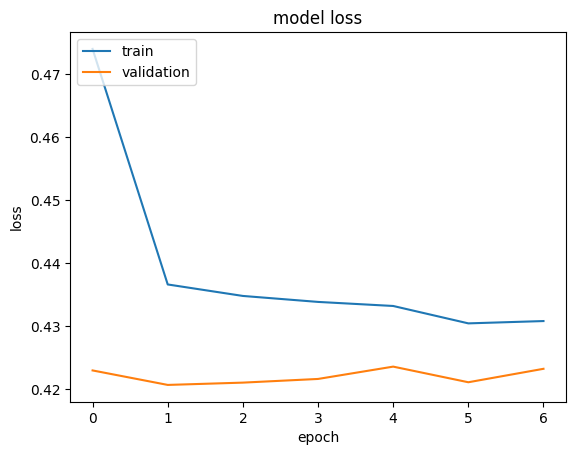

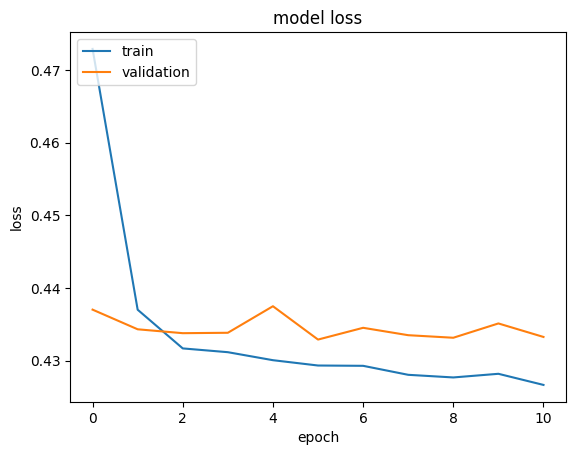

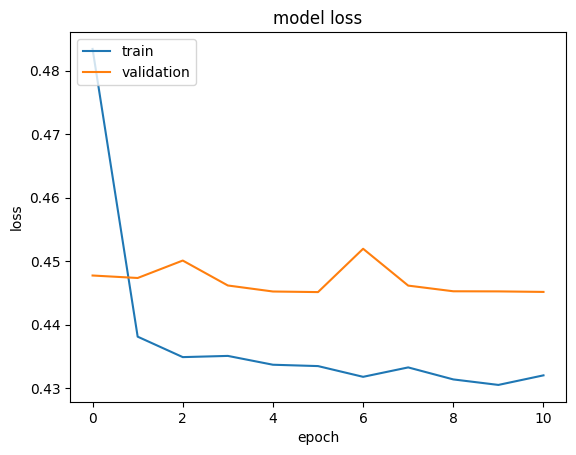

In [7]:
model.plot_history()

1251/1251 [==============================] - 1s 851us/step


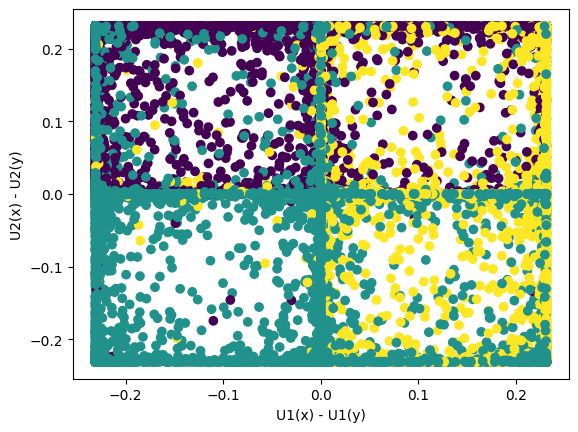

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1],
            model.predict_utility(X)[:, 2]-model.predict_utility(Y)[:, 2],
            c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()